<a href="https://colab.research.google.com/github/ahyen/ML-assignment/blob/master/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd ../content/drive/My Drive/Colab Notebooks/ML

/content/drive/My Drive/Colab Notebooks/ML


# **1. Input points**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#load data
path = "data.csv"
data = np.genfromtxt(path, delimiter = ',')

x_data = data[:, 0]
y_data = data[:, 1]

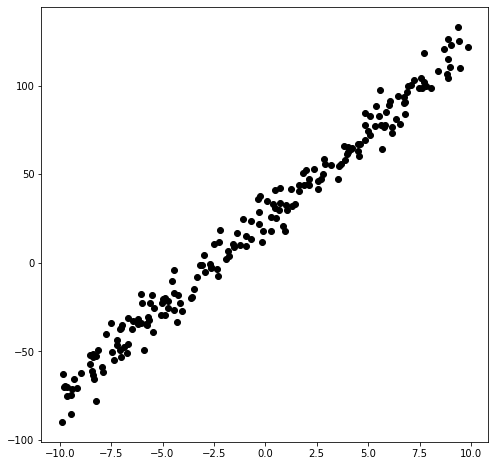

In [56]:
#plotting the input data
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color = 'black')
plt.show()

# **2. linear regression result**

In [57]:
#set theta0, theta1
theta0 = -30
theta1 = -30

#make list for save cost, theta0 and theta1
cost_list = []
theta0_list = []
theta1_list = []

#set learning rate and iteration
alpha = 0.005
iteration = 10000

for i in range(iteration):

  theta0_list.append(theta0)
  theta1_list.append(theta1)
  hypothesis = theta0 + theta1 * x_data
  # print(hypothesis)
  error = hypothesis - y_data
  
  #objective function
  cost = (error ** 2).mean()/2
  cost_list.append(cost)

  #gradient descent
  theta0_grad = error.mean()
  theta1_grad = (error * x_data).mean()

  theta0 = theta0 - alpha * (theta0_grad)
  theta1 = theta1 - alpha * (theta1_grad)
  

#final theta0 and theta1
print(theta0, theta1)

24.907393293947656 9.934635539221349


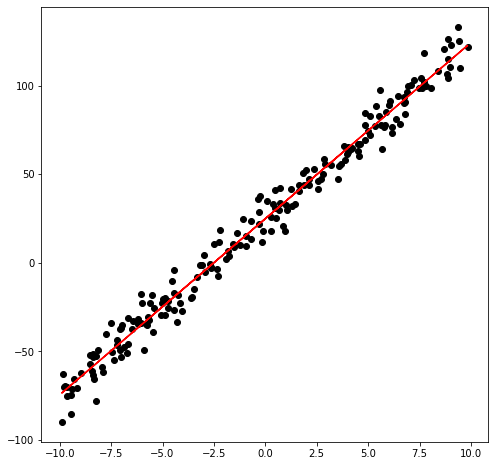

In [58]:
#plotting the results
plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color='black')
plt.plot(x_data, hypothesis, color='red')
plt.show()

# **3. Plot the energy surface**

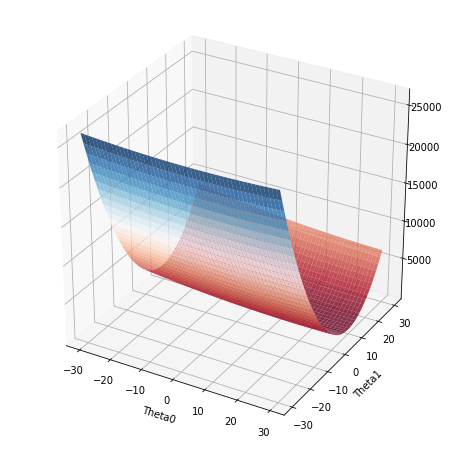

In [66]:
#set range
x = np.arange(-30, 30, 0.1)
y = np.arange(-30, 30, 0.1)
j = []
Theta0, Theta1 = np.meshgrid(x, y)

#calculate cost 
for theta0, theta1 in zip(np.ravel(Theta0), np.ravel(Theta1)):
  hypothesis = np.add(np.multiply(theta1, x_data), theta0)
  cost =  ((hypothesis - y_data)** 2).mean()/2
  j.append(cost)

J = np.array(j).reshape(Theta0.shape)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

#plot energy surface
ax.plot_surface(Theta0, Theta1, J,  alpha=0.8, cmap = plt.cm.RdBu)
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')

plt.show()

# **4. Plot the gradient descent path on the energy surface**

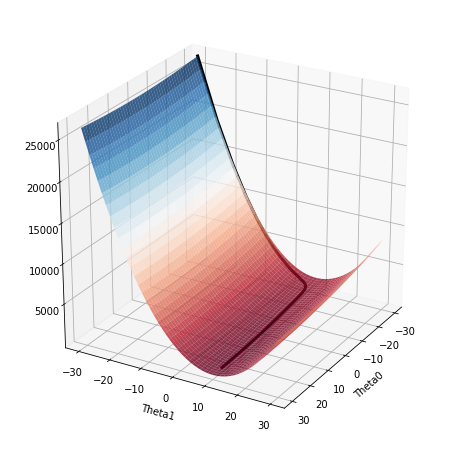

In [75]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

#plot energy surface
ax.plot_surface(Theta0, Theta1, J,  alpha=0.8, cmap = plt.cm.RdBu)

#plot optimization path
ax.plot(theta0_list, theta1_list, cost_list, linewidth=3, color='black')

ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')

#rotate to see optimization path easily
ax.view_init(elev=25,azim=30)
plt.show()
